##### Problem Statement
- Prediction of Medical insaurance cost using Machine learning

### Business Problem
With the covid 19 impact in the market, we have seen lot of changes in the medical insaurance policies. Now some meddical insaurance companies are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small insaurance company. With the change in market due to covid 19 impact, our client is facing problems with their previous medical insaurance cost valuation machine learning models. So, they are looking for new machine learning models from new data.

- Target Column / Dependent Feature :
  Charges

- Independent Column:
  age , sex , bmi , children , smoker , reigon

### Importing Necessary Liabraries

In [2]:
import numpy as np
import pandas as pd

#for Visualization
import matplotlib.pyplot as plt
import  seaborn as sns

#to import vif(Variance Inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#to import train test split
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

#To import Decision Tree
from sklearn.tree import DecisionTreeRegressor,plot_tree

#to import linear regression
from sklearn.linear_model import LinearRegression

#to import evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

# Importing Test 
from scipy.stats import shapiro,kstest,normaltest

# to import Random Forest , Adaboost , Gradient boost Regressors

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder


C:\Users\MJ\AppData\Local\Temp\ipykernel_8748\3662341962.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importing Neccessary Dataset

In [3]:
df=pd.read_csv(r"F:\Mayank Study\Itvedant\DataSet\ML Datasets\medical_insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16885
1,18,male,33.770,1,no,southeast,1726
2,28,male,33.000,3,no,southeast,4449
3,33,male,22.705,0,no,northwest,21984
4,32,male,28.880,0,no,northwest,3867
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8570
2768,21,female,34.600,0,no,southwest,2020
2769,19,male,26.030,1,yes,northwest,16451
2770,23,male,18.715,0,no,northwest,21595


The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable **"Charges"** which stores the medical insaurance cost and it is continuous in nature which makes this to be a **"Regression Problem"**.

#### Data Description(Attribute Information)

- age - age of patient
- sex - Gender of patients
- bmi - Calculated Body mass index
- children - How many children do patient have ?
- smoker - is patient smoker or non-smoker
- region - reigon which patient belongs to	
- charges - Charges of medical insaurance cost

### EDA (Exploratory Data Analysis)

In [5]:
print(f"The dataset has {df.shape[0]} and {df.shape[1]} columns")

The dataset has 2772 and 7 columns


In [6]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 151.7+ KB


- This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.
- The dataset contains object type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.
- Since counts of some of the columns are different, which means there are null values present in the dataset.

In [114]:
# Statistical summary of dataset
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.690242,1.101732,0.203463,1.532468,12455.483405
std,14.081459,0.500038,6.094852,1.214806,0.402647,1.103467,10174.134802
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1122.000000
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4688.000000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,2.000000,9333.000000
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16578.000000
max,64.000000,1.000000,47.595000,5.000000,1.000000,3.000000,34413.000000


In [8]:
##checking the columns in dataset
print("Columns Present in our dataset are\n",df.columns)

Columns Present in our dataset are
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [9]:
## Checking unique values in each dataset
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1294


In [10]:
df.isna().sum()  #Checking Null Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Preprocessing

### Converting Categorical values into numerical 

##### using Label encoder

In [11]:
le=LabelEncoder()

In [12]:

for i in df.columns:
    if df[i].dtypes =="object":
        df[i]=le.fit_transform(df[i])


In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16885
1,18,1,33.770,1,0,2,1726
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3867
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8570
2768,21,0,34.600,0,0,3,2020
2769,19,1,26.030,1,1,1,16451
2770,23,1,18.715,0,0,1,21595


In [14]:
le.inverse_transform(df["region"])

array(['southwest', 'southeast', 'southeast', ..., 'northwest',
       'northwest', 'southwest'], dtype=object)

###  Data Visualization

##### Univariate Analysis

<Axes: xlabel='age', ylabel='Density'>

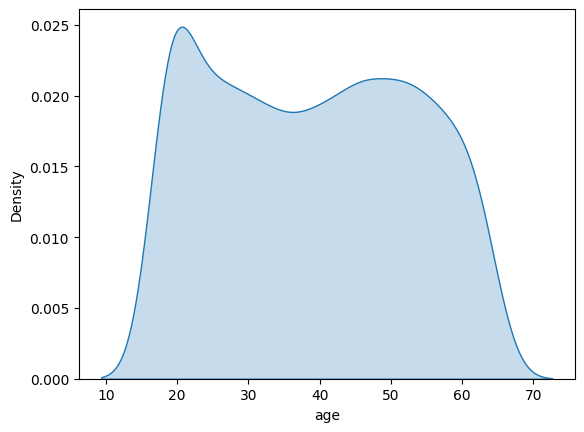

In [15]:
sns.kdeplot(df["age"],fill=True)

<Axes: xlabel='bmi', ylabel='Density'>

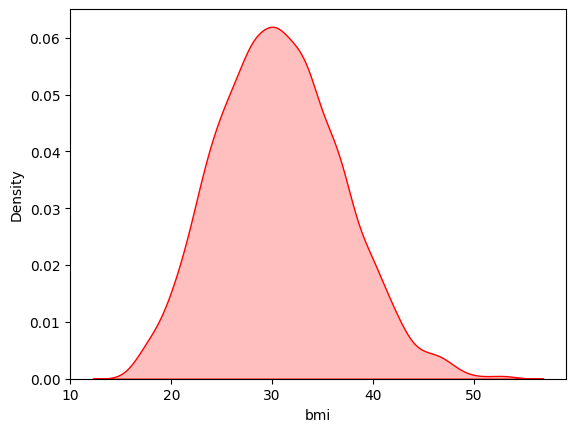

In [16]:
sns.kdeplot(df["bmi"],fill=True,color="r")

<Axes: xlabel='sex', ylabel='Density'>

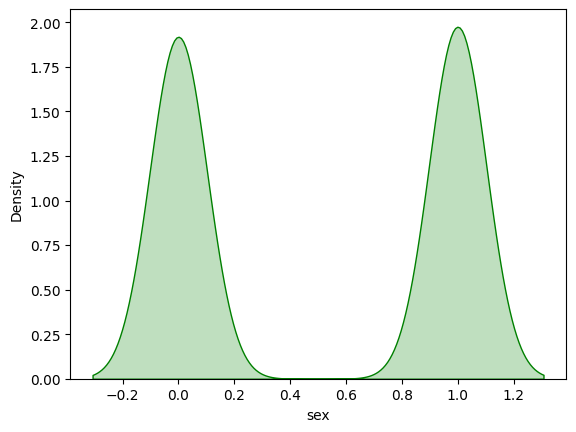

In [17]:
sns.kdeplot(x=df["sex"],fill=True,color="g")

<Axes: xlabel='children', ylabel='Count'>

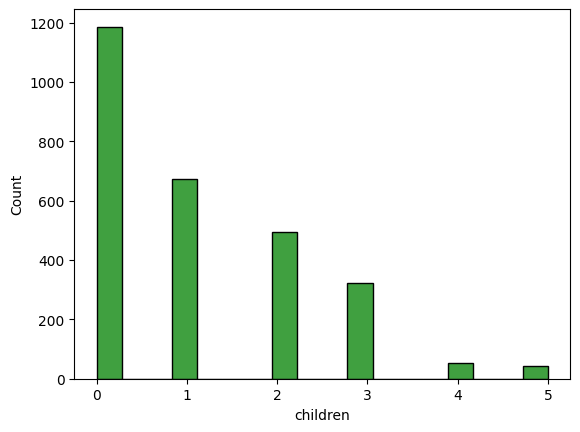

In [115]:
sns.histplot(df["children"],color="g")

<Axes: xlabel='region', ylabel='count'>

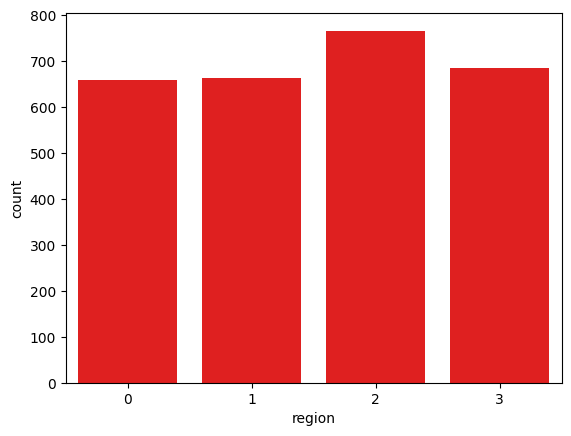

In [116]:
sns.countplot(x=df["region"],color="r")

<Axes: xlabel='sex', ylabel='count'>

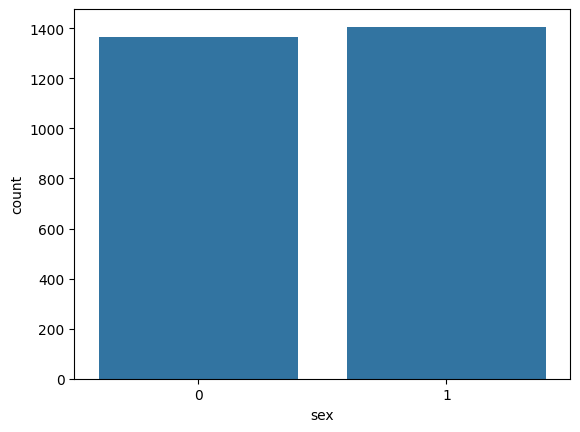

In [20]:
sns.countplot(x=df["sex"],fill=True)

### Bivariate Analysis

#### visualizing medical insaurance cost vs age

<Axes: title={'center': 'Age vs Medical Cost'}, xlabel='age', ylabel='charges'>

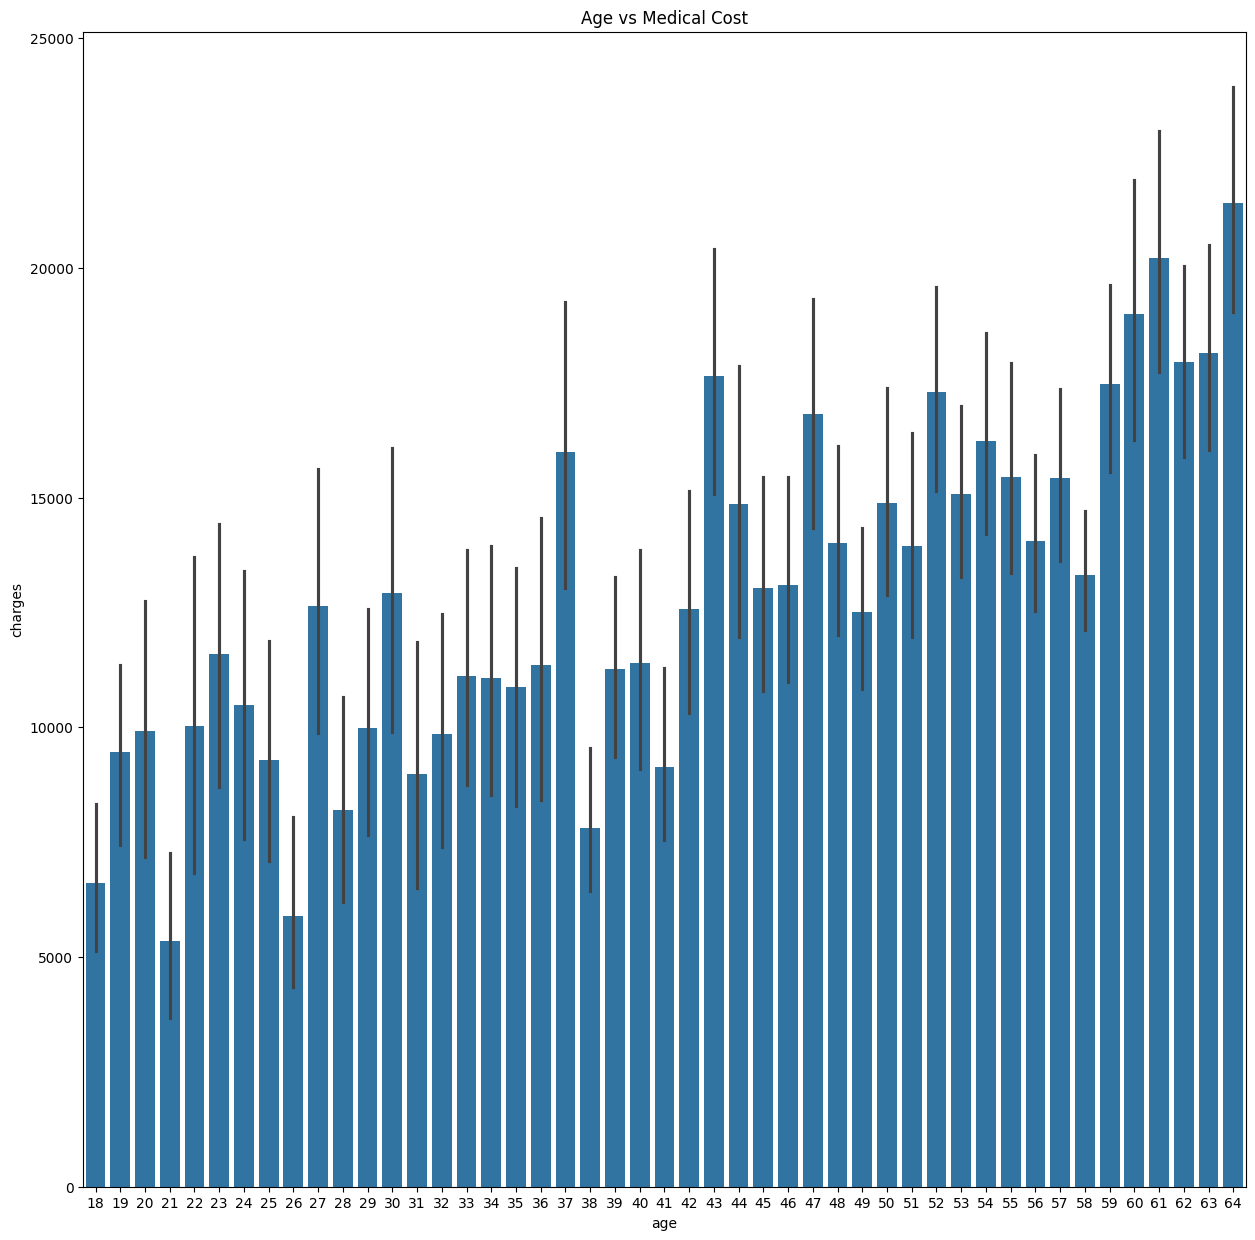

In [127]:
plt.figure(figsize=(15,15))
plt.title("Age vs Medical Cost")
sns.barplot(x=df["age"],y=df["charges"])

##### Observations:

- Age vs MedicalCost - From the bar plot we can observe that as age is higher the medical insaurance cost is   high

<Axes: title={'center': 'Smoker vs Medical Cost'}, xlabel='smoker', ylabel='charges'>

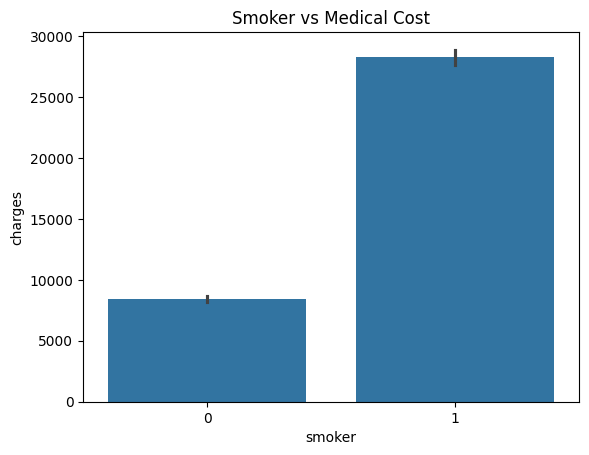

In [126]:
plt.title("Smoker vs Medical Cost")
sns.barplot(x=df["smoker"],y=df["charges"])

### Observations:

- Smoker vs Medical Insaurance cost : from above barplot we can observe that As the patient is an Smoker the medical cost is high

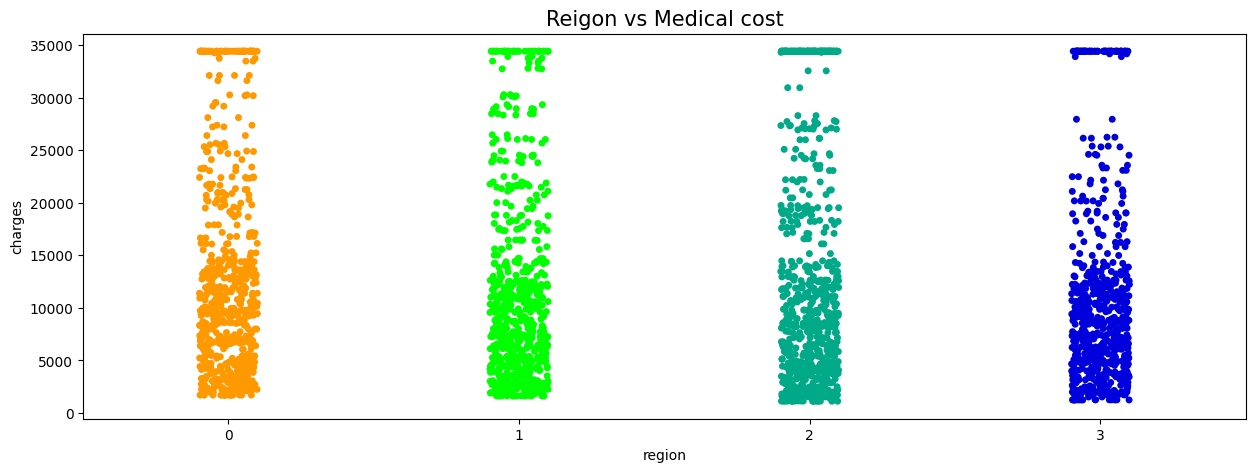

In [130]:
plt.figure(figsize=(15,5))
sns.stripplot(x=df["region"],y=df["charges"],palette="nipy_spectral_r")
plt.title("Reigon vs Medical cost",fontsize=15)
plt.show()

### Observations

- From Above visualization we can clearly observe that reigon 1 has highest medical cost as compared to others

### Multivariate analysis 

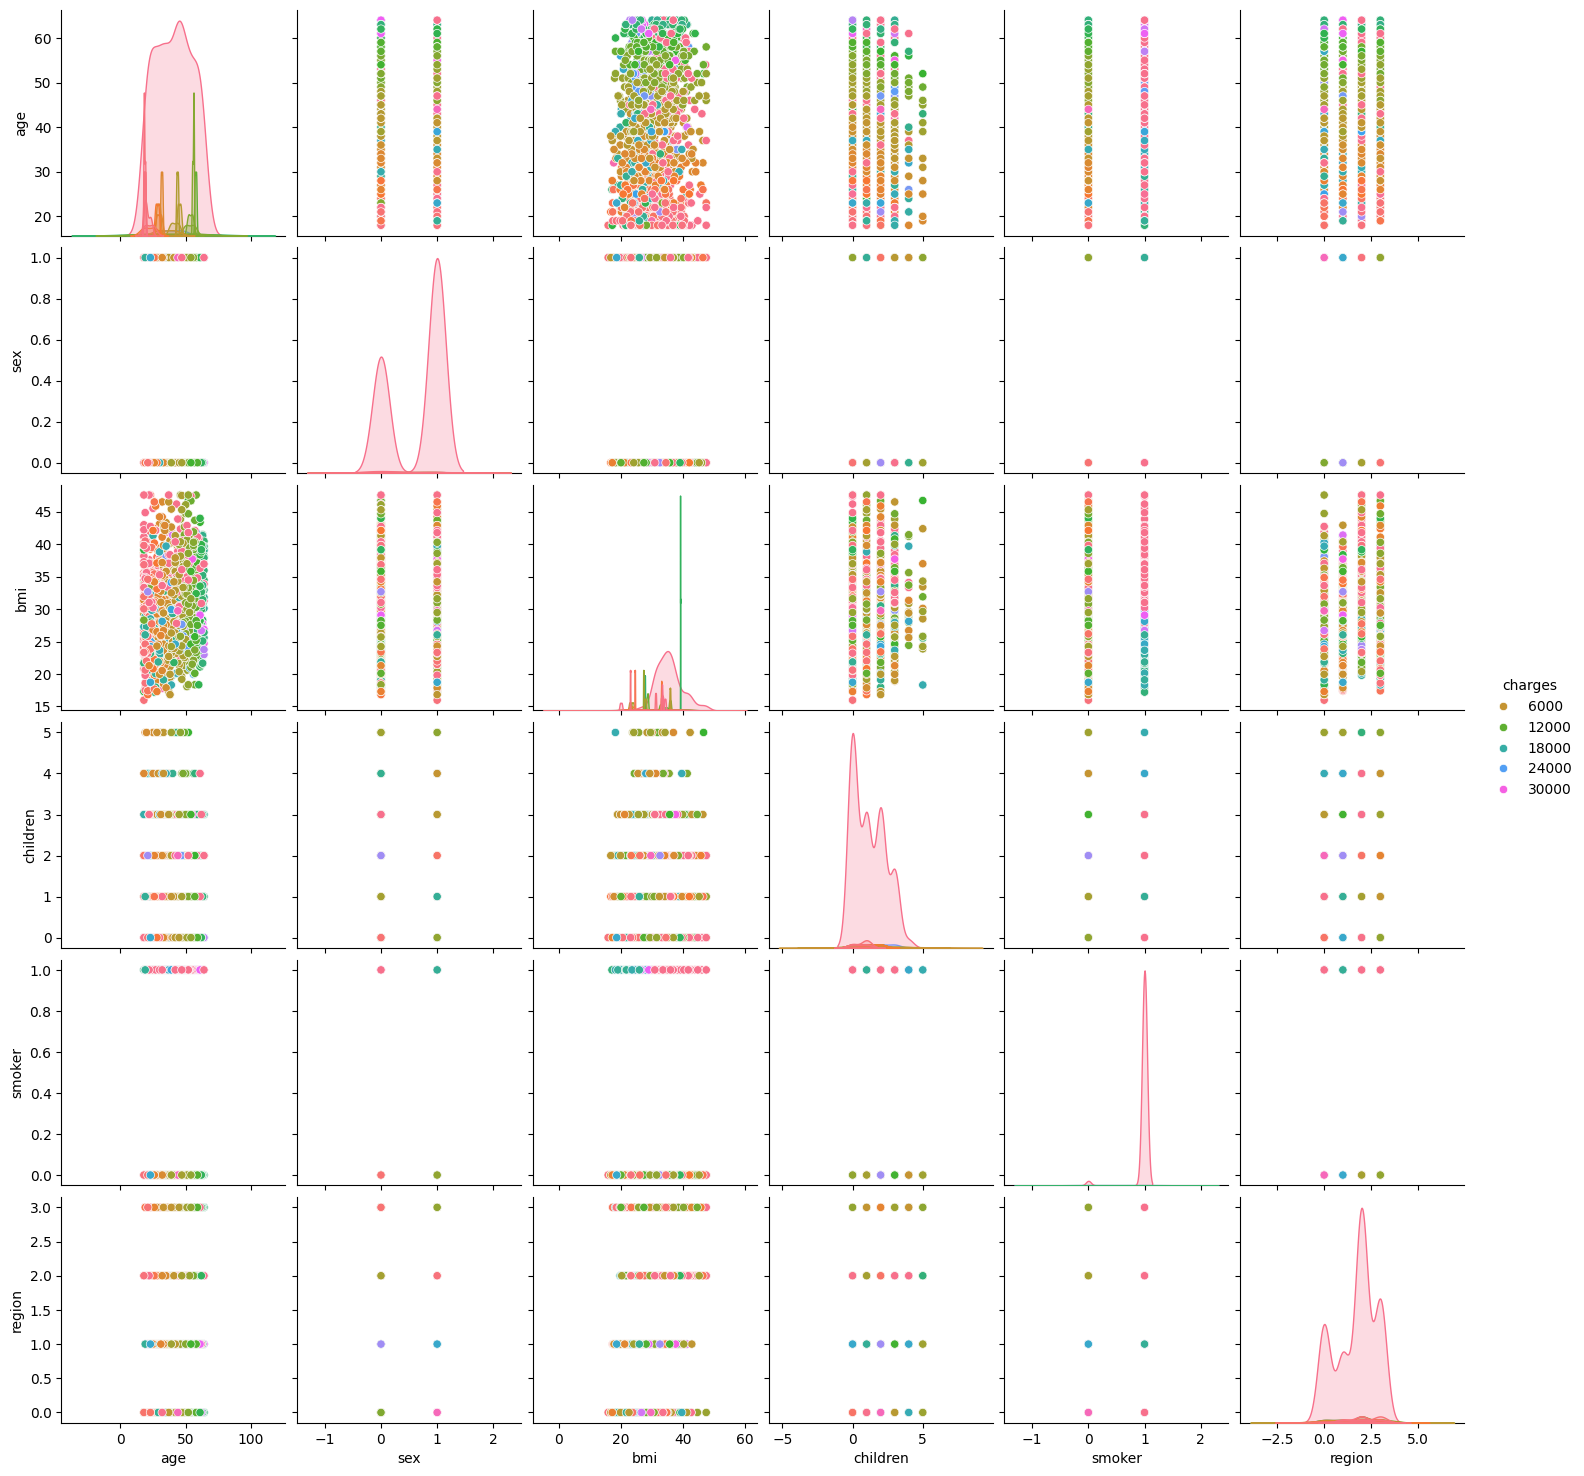

In [133]:
sns.pairplot(df,hue="charges",palette="husl")
plt.show()

- The pairplot gives the pairwise relation between the features on the basis of the target "Car_Price". On the diagonal we can notice the distribution plots.
- From the pair plot we can observe some of the features have strong correlation with each other and some of them have weak correlation with each other.
- We can also find some outliers present in the data, we will remove them using appropriate methods.

In [21]:
df["charges"].value_counts()  #Checking Value Counts Of Target Columns

charges
1632     6
3172     6
13471    6
1136     6
10602    6
        ..
1770     2
1970     2
4032     2
7512     2
29141    2
Name: count, Length: 1294, dtype: int64

In [22]:
df.isnull().sum()  ## Checking  Null Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Identifying the outliers in the dataset using BoxPlots

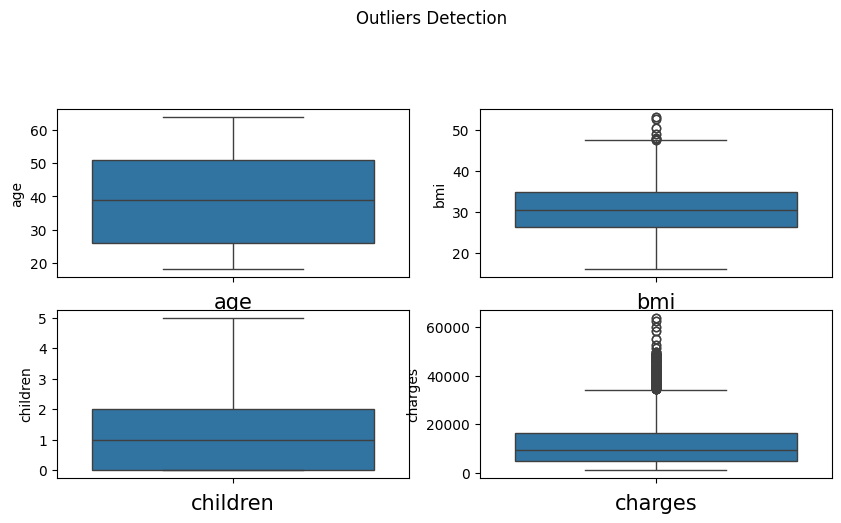

<Figure size 640x480 with 0 Axes>

In [23]:
# Checking Outliers by Calculations [BEFORE]
plt.figure(figsize=(10,10))
plt.suptitle("Outliers Detection")
pltn=1
columns_to_exclude=["sex","smoker","region"]

for i  in df:
    if i not in columns_to_exclude and pltn<=6:
        plt.subplot(4,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        pltn+=1
plt.show()
plt.tight_layout()

- From the above boxplot we can observe that outliers are present in "bmi" column and "charges" column which is our target column

## Feature Engineering

- Removing Outliers Using Inter Quartile Method (IQR)

In [24]:
def find_outliers(m):
    q1=df[m].quantile(0.25)
    q3=df[m].quantile(0.75)

    iqr = q3-q1

    lower_tail = q1-1.5*iqr
    upper_tail = q3+1.5*iqr

    print(f"Lower Tail : {lower_tail}")
    print(f"Upper Tail : {upper_tail}")

    outliers=df[(df[m]<lower_tail) | (df[m]>upper_tail)]
    df[m]=np.where(df[m]<lower_tail,lower_tail,np.where(df[m]>upper_tail,upper_tail,df[m]))
    return df

In [25]:
find_outliers("bmi")

Lower Tail : 13.394999999999992
Upper Tail : 47.59500000000001


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16885
1,18,1,33.770,1,0,2,1726
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3867
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8570
2768,21,0,34.600,0,0,3,2020
2769,19,1,26.030,1,1,1,16451
2770,23,1,18.715,0,0,1,21595


In [26]:
find_outliers("charges")

Lower Tail : -13147.0
Upper Tail : 34413.0


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16885.0
1,18,1,33.770,1,0,2,1726.0
2,28,1,33.000,3,0,2,4449.0
3,33,1,22.705,0,0,1,21984.0
4,32,1,28.880,0,0,1,3867.0
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8570.0
2768,21,0,34.600,0,0,3,2020.0
2769,19,1,26.030,1,1,1,16451.0
2770,23,1,18.715,0,0,1,21595.0


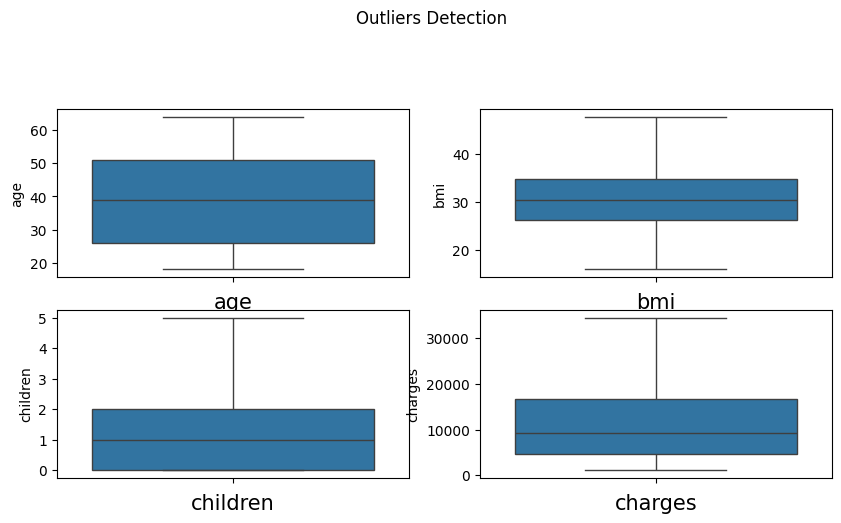

<Figure size 640x480 with 0 Axes>

In [27]:
# Checking Outliers by Calculations [AFTER]
plt.figure(figsize=(10,10))
plt.suptitle("Outliers Detection")
pltn=1
columns_to_exclude=["sex","smoker","region"]

for i  in df:
    if i not in columns_to_exclude and pltn<=6:
        plt.subplot(4,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        pltn+=1
plt.show()
plt.tight_layout()

- As we can see all the outliers has been replaced by its lower and upper quartile

## Feature Selection

##### Assumption 1 : Linearity

- Pearsons Coeff of Correlation:

    R=sum[(x-xmean)*(y-ymean)] / np.sqrt((x-xmean)^2)*((y-ymean)^2)

- Range=-1 to +1

In [28]:
# checking correlation between features and target
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026046,0.115491,0.037574,-0.023286,0.000932,0.312247
sex,-0.026046,1.000000,0.041485,0.016020,0.082326,0.004808,0.056570
bmi,0.115491,0.041485,1.000000,-0.000713,0.011008,0.159411,0.162007
children,0.037574,0.016020,-0.000713,1.000000,0.006362,0.016111,0.071045
smoker,-0.023286,0.082326,0.011008,0.006362,1.000000,-0.006751,0.786309
region,0.000932,0.004808,0.159411,0.016111,-0.006751,1.000000,-0.025474
charges,0.312247,0.056570,0.162007,0.071045,0.786309,-0.025474,1.000000


<Axes: >

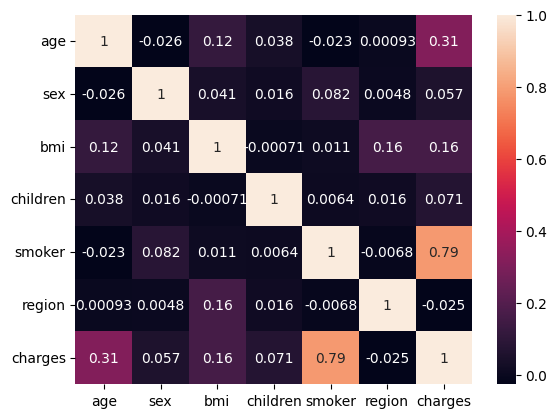

In [29]:
#Visualizing the correlation matrix by plotting heat map
sns.heatmap(df.corr(),annot=True)

##### Observation 

- from above heat map we can observe correlation between one feature to other.
- In the above heatmap we can observe that the light colour represents Strong Correlation and dark colour represents weak correlation.

<Axes: >

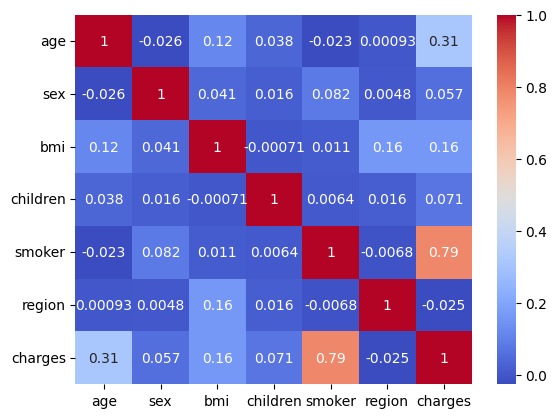

In [30]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

### Assumption No.2 : No MultiColinearity

In [31]:
#checking variance inflation factor
vif_df= pd.DataFrame()
df1= df.iloc[:,:6]
vif_df["Columns"]= df1.columns
vif_df

,Columns
0,age
1,sex
2,bmi
3,children
4,smoker
5,region


In [32]:
a=[]
for i in range(df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    a.append(vif)

In [33]:
a

[7.544549316315355,
 2.0069404654452123,
 10.436410342634879,
 1.791511759207,
 1.2576213281164839,
 2.972500761069969]

In [34]:
vif_df["VIF"]=a

In [35]:
vif_df

,Columns,VIF
0,age,7.544549
1,sex,2.006940
2,bmi,10.436410
3,children,1.791512
4,smoker,1.257621
5,region,2.972501


In [36]:
x=df1  #independent features 
y=df["charges"]  ## Target/dependent Column

In [37]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2
2768,21,0,34.600,0,0,3
2769,19,1,26.030,1,1,1
2770,23,1,18.715,0,0,1


#### Creating New Train test split

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

- ###### I am taking 20 percent of the complete dataset for testing purpose and remaining 80 percent will be used for training machine learning model

In [39]:
xtrain.shape

(2217, 6)

In [40]:
xtest.shape

(555, 6)

In [41]:
ytrain.shape

(2217,)

In [42]:
ytest.shape

(555,)

### Model Training

#### 1. Linear Regression

In [43]:
lin_reg=LinearRegression()
lin_reg_model=lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

In [47]:
ytrain_pred=lin_reg_model.predict(xtrain)
ytrain_pred

array([4028.75433046, 6862.24177489, 8738.55729608, ..., 8856.58335711,
       6424.83078019, 4610.03496391])

In [48]:
ytrain.head()

2000     1880.0
2551     5228.0
2529     6338.0
216     10356.0
273      9618.0
Name: charges, dtype: float64

In [49]:
residual=ytrain-ytrain_pred
residual

2000    -2148.754330
2551    -1634.241775
2529    -2400.557296
216      -184.968642
273     -1056.429842
            ...     
389     -1431.608312
2457      -32.062847
1891    -2059.583357
291     13853.169220
2714    17785.965036
Name: charges, Length: 2217, dtype: float64

### 3.Normality Of Residual

<Axes: xlabel='charges', ylabel='Density'>

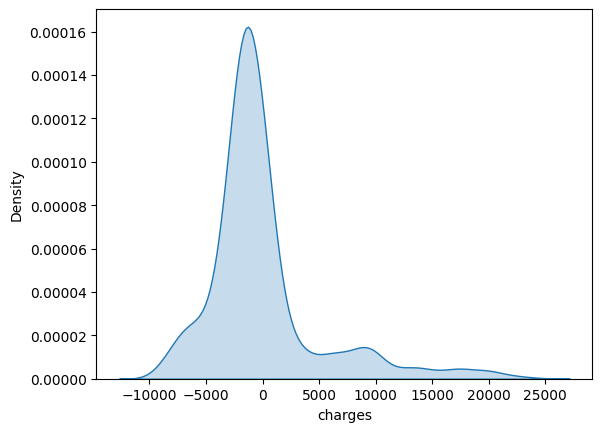

In [50]:
sns.kdeplot(residual,fill=True)

- ###### From the above graph we can see that the graph is normally distributed and mean =0

### Hypothesis testing by shapiro

In [51]:
#Hypothesis testing 
stats,p_value=shapiro(residual)
print(f"stats:{stats}")
print(f"Pvalue:{p_value}")

if p_value <=0.05:
    print("Residual is Normally distributed")
    print("Null Hypothesis H0 is True")

else:
    print("residual is not normally distributed")
    print("Alternative Hypothesis H1 is True")
    

stats:0.8075303717859486
Pvalue:1.7742495677342275e-45
Residual is Normally distributed
Null Hypothesis H0 is True


### By Normal Test

In [52]:
stats,p_value=normaltest(residual)
print(f"stats:{stats}")
print(f"Pvalue:{p_value}")

if p_value <=0.05:
    print("Residual is Normally distributed")
    print("Null Hypothesis H0 is True")

else:
    print("residual is not normally distributed")
    print("Alternative Hypothesis H1 is True")
    

stats:835.587917264739
Pvalue:3.584174894271085e-182
Residual is Normally distributed
Null Hypothesis H0 is True


In [54]:
np.mean(residual)

2.1923047750448933e-12

### 4.Homoscadasticity

<Axes: ylabel='charges'>

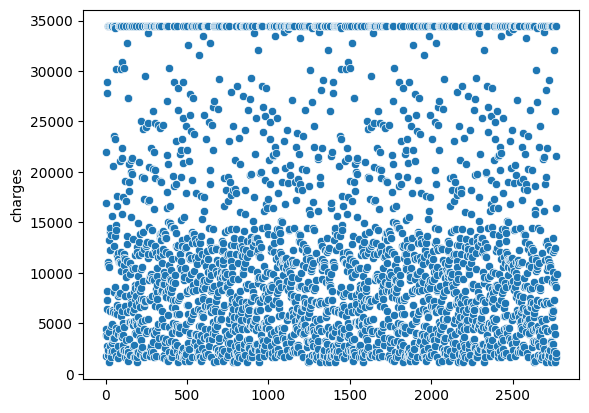

In [55]:
sns.scatterplot(df["charges"])

- ###### Above graph of target is normally distributed

<Axes: xlabel='charges', ylabel='charges'>

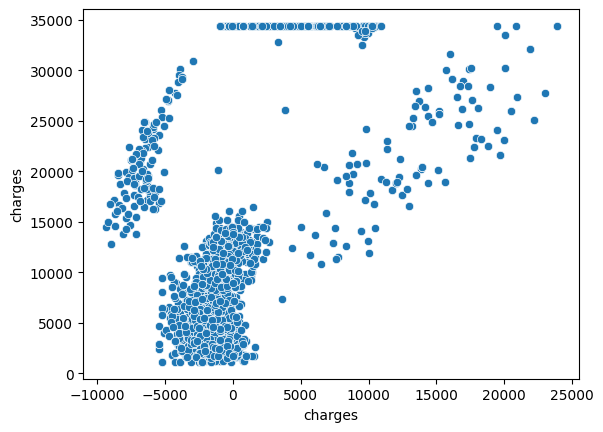

In [56]:
sns.scatterplot(x=residual,y=df["charges"])

### Model Evaluation

In [58]:
MSE= mean_squared_error(ytrain,ytrain_pred)
print(f"Mean Squ Error:{MSE}")
print("-"*40)

MAE= mean_absolute_error(ytrain,ytrain_pred)
print(f"Mean Abs Error:{MAE}")
print("-"*40)

RMSE = np.sqrt(MSE)
print(f"Root Mean Squ Error:{RMSE}")
print("-"*40)

r2= r2_score(ytrain,ytrain_pred)
print(f"r2 Score:{r2}")
print("-"*40)


Mean Squ Error:26500358.94773146
----------------------------------------
Mean Abs Error:3350.767670253085
----------------------------------------
Root Mean Squ Error:5147.84993446113
----------------------------------------
r2 Score:0.7498796996181605
----------------------------------------


In [60]:
ytest

1593    20984.0
2293     7634.0
1074    13204.0
197      8517.0
213      5003.0
         ...   
1307    21472.0
2578    13019.0
920     13451.0
404      3260.0
94      34413.0
Name: charges, Length: 555, dtype: float64

In [62]:
ytest_pred=lin_reg_model.predict(xtest)
ytest_pred

array([27822.91616851,  9687.77620269, 10834.87882322,  9546.54338208,
        6271.71099605, 26083.58025764, 11637.49208214,  3302.84249028,
        5675.54722181,  8302.51457903, 23903.76776471, 30232.14954606,
       24655.61328307,  5844.96067001,  6287.7276214 ,  8728.08362065,
       31687.61405405, 12300.56243822,  2679.23561655, 12533.2310659 ,
       14732.67619744,  5908.30058421, 26625.31412444,  2741.71990225,
       32354.86574954, 10404.42465766, 14339.43989737, 13075.64816418,
        6268.18722012,  5844.96067001,  6422.23109273, 13189.78742565,
       29364.07439859,  7173.98588837,  9183.88097902,  7407.63767126,
        8711.61828798, 10841.03624341, 10056.27270843,  4278.99268914,
        5027.72259729,   339.31179397, 15194.31134114,  5973.28310771,
        5309.46538894,  3047.88624047,  9365.19278924, 10580.7304844 ,
        9058.3531603 , 32895.3330573 ,  6575.79619709, 10879.25478337,
        3403.38539635,  8324.90427307, 12015.82051508, 13093.83128369,
      

In [63]:
MSE= mean_squared_error(ytest,ytest_pred)
print(f"Mean Squ Error:{MSE}")
print("-"*40)

MAE= mean_absolute_error(ytest,ytest_pred)
print(f"Mean Abs Error:{MAE}")
print("-"*40)

RMSE = np.sqrt(MSE)
print(f"Root Mean Squ Error:{RMSE}")
print("-"*40)

r2= r2_score(ytest,ytest_pred)
print(f"r2 Score:{r2}")
print("-"*40)

Mean Squ Error:25672194.195122976
----------------------------------------
Mean Abs Error:3311.206176572161
----------------------------------------
Root Mean Squ Error:5066.773548829963
----------------------------------------
r2 Score:0.724111615127867
----------------------------------------


### ALGORITHM 2. DECISION TREE

##### MODEL TRAINING

In [66]:
dt_reg=DecisionTreeRegressor()
dt_reg_model=dt_reg.fit(xtrain,ytrain)
dt_reg_model

DecisionTreeRegressor()

### Model Evaluation

In [70]:
ytrain_pred=dt_reg_model.predict(xtrain)


In [72]:
## for training data 
def Train(L):
    MSE= mean_squared_error(ytrain,ytrain_pred)
    print(f"Mean Squ Error:{MSE}")
    print("-"*40)

    MAE= mean_absolute_error(ytrain,ytrain_pred)
    print(f"Mean Abs Error:{MAE}")
    print("-"*40)

    RMSE = np.sqrt(MSE)
    print(f"Root Mean Squ Error:{RMSE}")
    print("-"*40)

    r2= r2_score(ytrain,ytrain_pred)
    print(f"r2 Score:{r2}")
    print("-"*40)
    

In [73]:
Train(ytrain_pred)

Mean Squ Error:235765.07216959857
----------------------------------------
Mean Abs Error:28.545782589084347
----------------------------------------
Root Mean Squ Error:485.5564562124559
----------------------------------------
r2 Score:0.9977747610593911
----------------------------------------


In [74]:
ytest_pred=dt_reg_model.predict(xtest)

In [78]:
def Test(R):
    MSE = mean_squared_error(ytest,ytest_pred)
    print(f"Mean Squared error : {MSE}")
    print("*"*40)

    MAE=mean_absolute_error(ytest,ytest_pred)
    print(f"Mean Absolute Error : {MAE}")
    print("*"*40)

    RMSE=np.sqrt(MSE)
    print(f"Root mean squared error: {RMSE}")
    print("*"*40)

    r2=r2_score(ytest,ytest_pred)
    print(f"r2 score is : {r2}")
    print("*"*40)

In [79]:
Test(ytest_pred)

Mean Squared error : 12698388.5009009
****************************************
Mean Absolute Error : 787.772972972973
****************************************
Root mean squared error: 3563.479830292421
****************************************
r2 score is : 0.8635357045305478
****************************************


- From above decision tree algorithm R2 score is 99% for training and 86% for testing which may lead to overfitting

### 2.1 Decision Tree With Hyperparameter Tunning

In [80]:
hypara= { "criterion":["squared_error","absolute_error"],
          "max_depth":np.arange(5,20),
          "min_samples_split" : np.arange(5,20),
          "min_samples_leaf":np.arange(5,20)}

In [81]:
RSCV=RandomizedSearchCV(dt_reg_model,hypara,cv=5)
RSCV=RSCV.fit(xtrain,ytrain)
RSCV

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [82]:
RSCV.best_estimator_

DecisionTreeRegressor(max_depth=17, min_samples_leaf=11, min_samples_split=13)

In [84]:
dt_hypo=DecisionTreeRegressor(max_depth=17, min_samples_leaf=11, min_samples_split=13)
dt_hypo_model=dt_hypo.fit(xtrain,ytrain)
dt_hypo_model

DecisionTreeRegressor(max_depth=17, min_samples_leaf=11, min_samples_split=13)

### Evaluation

In [90]:
ytrain_pred=dt_hypo_model.predict(xtrain)

In [91]:
Train(ytrain_pred)

Mean Squ Error:11902314.05218672
----------------------------------------
Mean Abs Error:1724.4274781103438
----------------------------------------
Root Mean Squ Error:3449.9730509363
----------------------------------------
r2 Score:0.8876615078367919
----------------------------------------


In [92]:
ytest_pred=dt_hypo_model.predict(xtest)

In [93]:
Test(ytest_pred)

Mean Squared error : 17116686.51985018
****************************************
Mean Absolute Error : 2166.4378789233897
****************************************
Root mean squared error: 4137.231745968575
****************************************
r2 score is : 0.8160540948532874
****************************************


- from above algorithm decision tree with hyperparameter tunning R2 score for training is 88% and testing score is 81 which i  thing is not best model

### ALGORITHM 3 : RANDOM FOREST
#### MODEL TRAINING

In [94]:
rf=RandomForestRegressor()
rf_model=rf.fit(xtrain,ytrain)
rf_model

RandomForestRegressor()

In [95]:
ytrain_pred=rf_model.predict(xtrain)

In [96]:
Train(ytrain_pred)

Mean Squ Error:1080103.0436781968
----------------------------------------
Mean Abs Error:433.6043803330684
----------------------------------------
Root Mean Squ Error:1039.280060271627
----------------------------------------
r2 Score:0.9898055834541345
----------------------------------------


In [98]:
ytest_pred=rf_model.predict(xtest)

In [99]:
Test(ytest_pred)

Mean Squared error : 9195547.191862335
****************************************
Mean Absolute Error : 1314.5196191191192
****************************************
Root mean squared error: 3032.4160650976532
****************************************
r2 score is : 0.9011792820085348
****************************************


- ##### Created Random Forest Model and checked its evaluation metrics . The Model is giving Training R2 score as 98% and Testing R2 score as 90% which i consider **Random Forest** as ***Best Model***

Save Final Model Into Pickle

In [101]:
import pickle

In [103]:
with open("rst.pkl","wb") as f :
    pickle.dump(rf_model,f)

In [105]:
y.head(1)

0    16885.0
Name: charges, dtype: float64

In [106]:
test_data=df.head(1).iloc[:,:6]
test_data

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3


## Taking Input From user

In [110]:
def costpred(age,sex,bmi,children,smoker,region):
    Data_test=pd.DataFrame({ "age" : [age],
                            "sex" : [sex],
                            "bmi" : [bmi],
                            "children" : [children],
                            "smoker" : [smoker],
                            "region" : [region] })
    with open ("rst.pkl","rb") as f :
        model=pickle.load(f)

    print(f"Calories Predicted : {model.predict(Data_test)[0]}")
    

In [111]:
costpred(18,1,33.770,1,0,2)

Calories Predicted : 2165.14


In [112]:
costpred(19,0,27.900,0,1,3)

Calories Predicted : 16873.28


In [113]:
costpred(32,1,28.880,0,0,1)

Calories Predicted : 3861.31


## Conclusion

Key Findings and conclusion of study

- The case study aims to give an idea of applying Machine Learning algorithms to predict the Medical cost. After the completion of this project, we got an insight of how to collect data, pre-processing the data, analyze the data, cleaning the data and building a model.

- we loaded the dataset and have done data cleaning, EDA process and pre-processing techniques like checking outliers,removing outliers,correlation, etc and got better insights from data visualization.

- From the visualizations we got to know that the continuous numerical variables having some strong positive linear relation with the label "Charges". By comparing charges and categorical variables we got to know that the patients who are smoker, have age greater than 45, have high medical cost .

- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model on the basis of different metrics like R2 Score, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error. We tried many algorithms like Linear regressor Decision Tree Regressor, Random Forest Regressor.

-  We got Random Forest Regressor as the best model among all the models as it gave least difference of R2 score and cross validation score and also the low evaluation metrics compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The R2 score increased after tunning.

- After that we saved the model in a pickle with a filename "rst.pkl" in order to use whenever we require. Then we loaded the saved file and predicted the values.

- Overall, we can say that this dataset is good for predicting the medical cost using regression analysis and conclude that Random Forest Regressor is the best working algorithm model we obtained. We can improve the data by adding some more features.